<a href="https://colab.research.google.com/github/RFJC21/ANN_keras_regression/blob/master/ANN_Keras_Regression_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [58]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [59]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Clean Data

In [60]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# Visualize Data

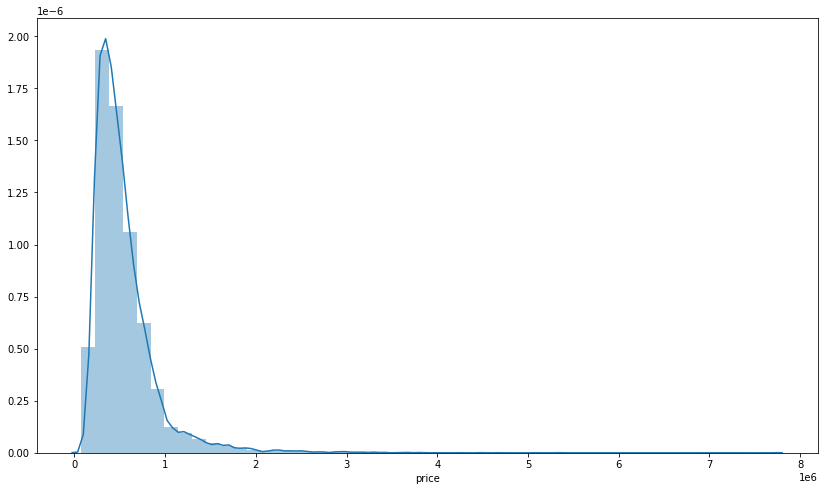

In [62]:
plt.figure(figsize=(14,8))
sns.distplot(df['price'])

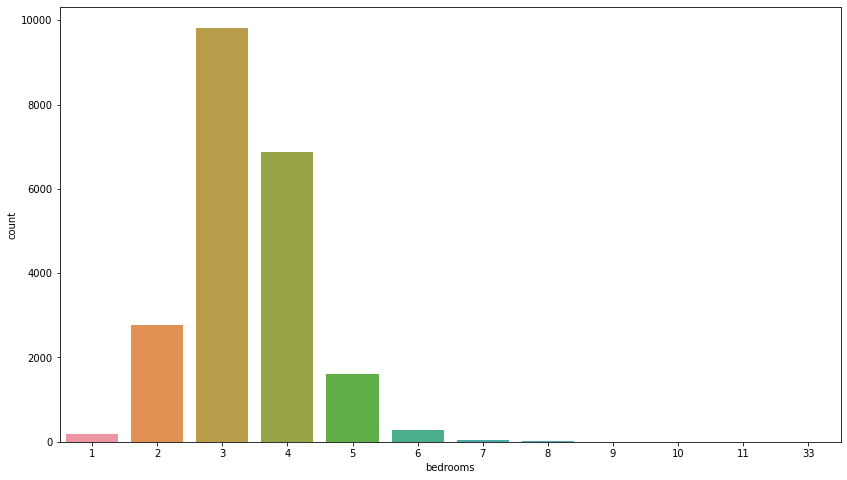

In [63]:
plt.figure(figsize=(14,8))
sns.countplot(df['bedrooms'])

In [64]:
correlation=df.corr()
correlation['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [65]:
mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.

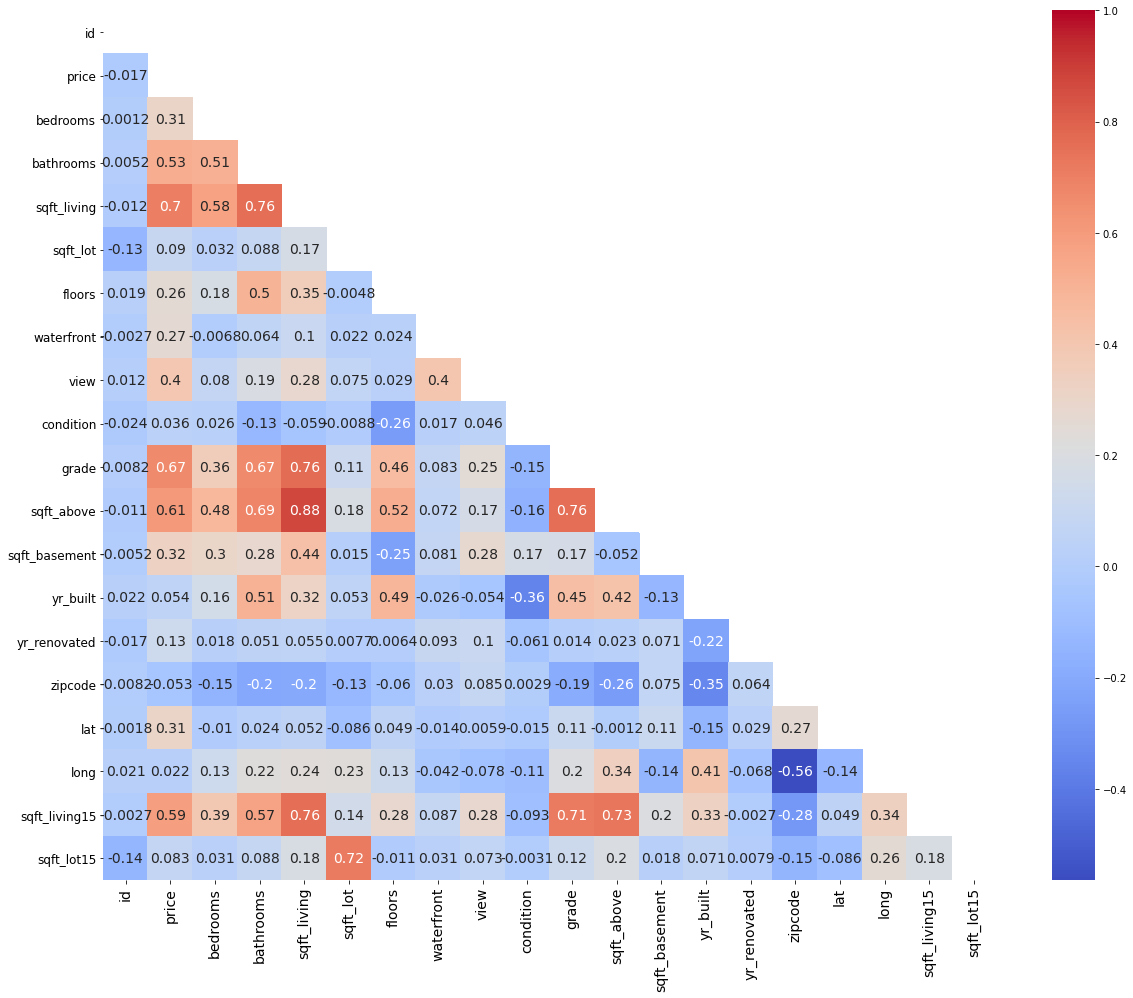

In [66]:
#Heat Map com matplotlib and seaborn
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), mask=mask, cmap="coolwarm",annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

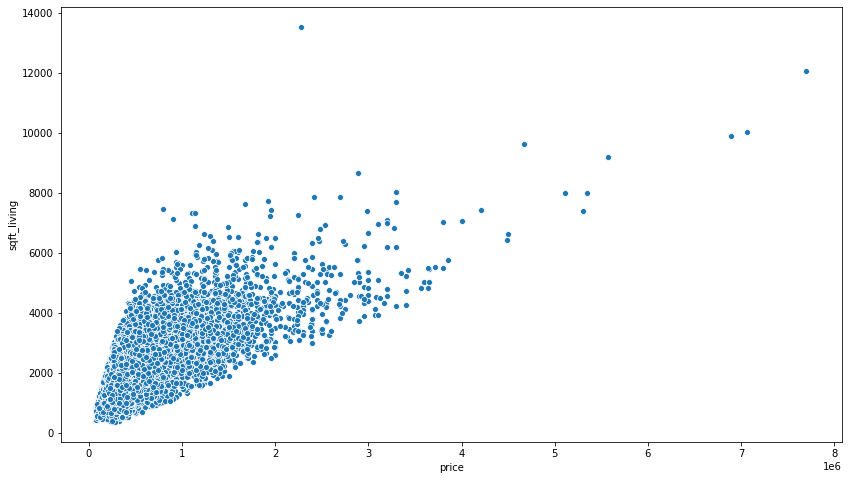

In [67]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

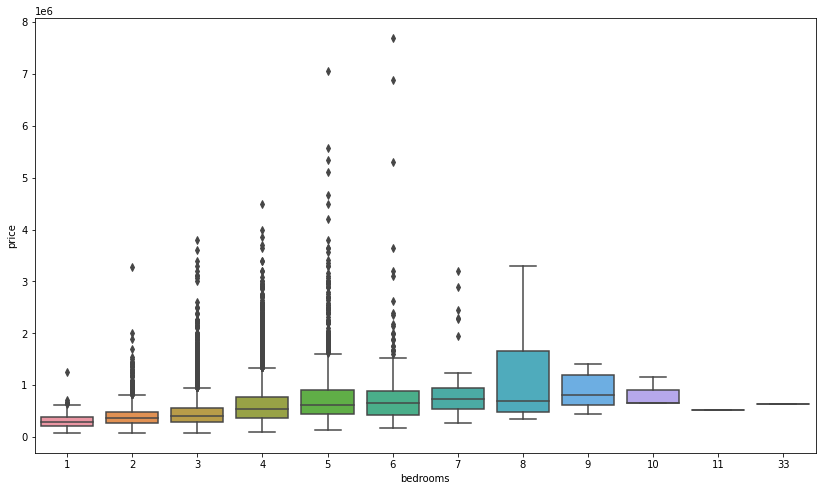

In [68]:
plt.figure(figsize=(14,8))
sns.boxplot(x='bedrooms',y='price',data=df)

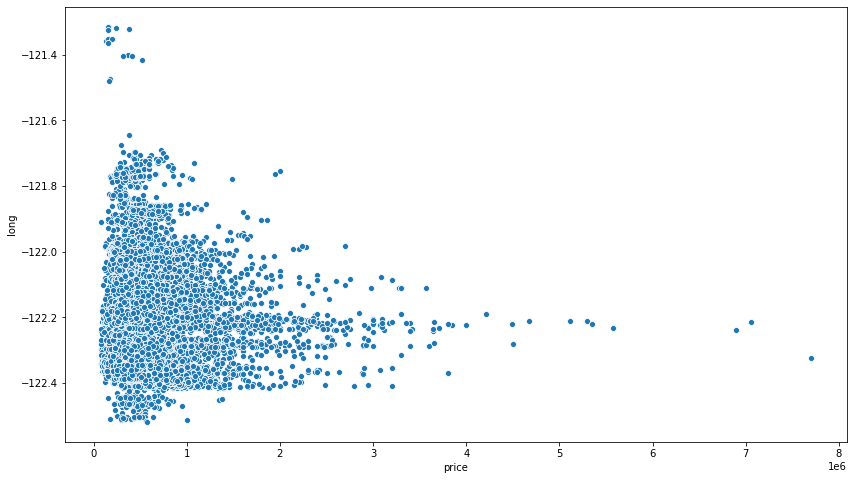

In [69]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='price',y='long',data=df)

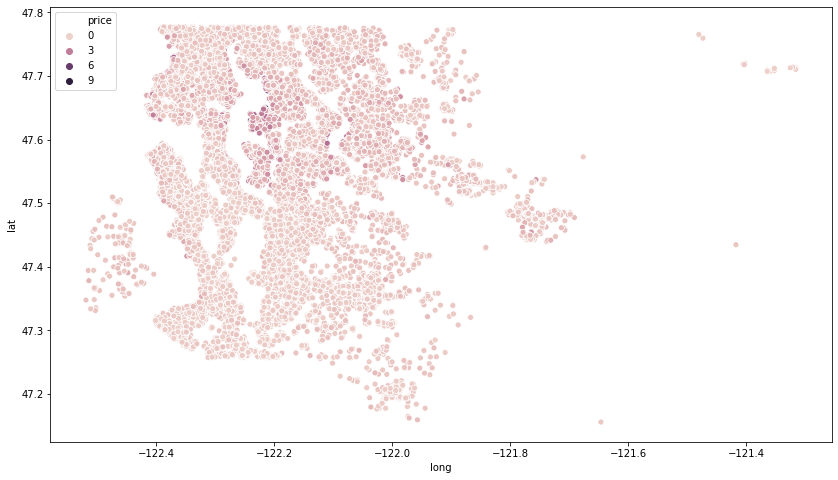

In [70]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [0]:
 #drop outliers

In [72]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [73]:
len(df)*0.01

215.97

In [0]:
non_top_1per=df.sort_values('price',ascending=False).iloc[216:]

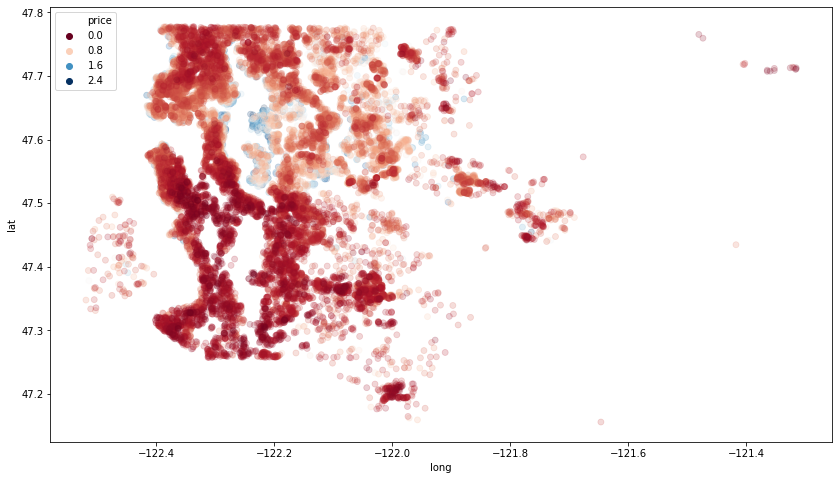

In [75]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='long',y='lat',data=non_top_1per,hue='price',edgecolor=None,alpha=0.2,palette='RdBu')

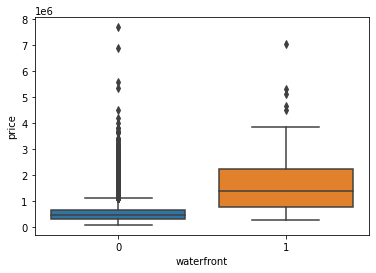

In [76]:
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering

In [0]:
# drop fetures

In [0]:
df=df.drop('id',axis=1)

In [0]:
df['date']=pd.to_datetime(df['date'])

In [0]:
#extract the year and month

In [0]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [82]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


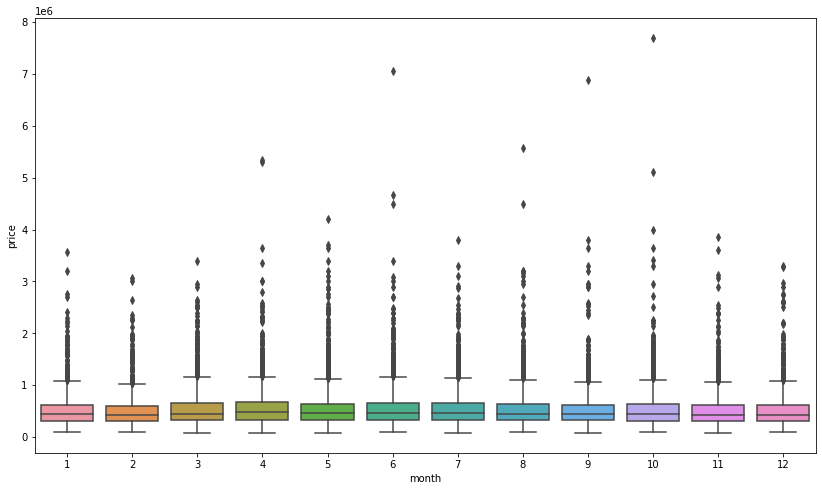

In [83]:
plt.figure(figsize=(14,8))
sns.boxplot(x='month',y='price',data=df)

In [84]:
#media por mes
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [85]:
df.groupby('year').mean()['price']

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [0]:
df=df.drop('date',axis=1)

In [0]:
df=df.drop('zipcode',axis=1)

In [88]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [89]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

# Split Data

In [0]:
#.values because of the validation data
X=df.drop('price',axis=1).values
y=df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Scale Data

In [0]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Create Model

In [94]:
X_train.shape

(15117, 19)

In [0]:
# tipicaly, number of neurons (units) -> number of features, neste caso 19!!

model=Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Fit Model to Trainning Data

In [96]:
# also pass Validation Data -> after every epoch on trainning in the training data, it runs on the test data anc check the loss on the test data
# because of the size of trainning data, lets use batch sizes
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=500)

Epoch 1/500
119/119 [==============================] - 0s 3ms/step - loss: 433433280512.0000 - val_loss: 418455420928.0000
Epoch 2/500
119/119 [==============================] - 0s 2ms/step - loss: 429525762048.0000 - val_loss: 418053095424.0000
Epoch 3/500
119/119 [==============================] - 0s 2ms/step - loss: 428138168320.0000 - val_loss: 414976966656.0000
Epoch 4/500
119/119 [==============================] - 0s 2ms/step - loss: 420393680896.0000 - val_loss: 402774818816.0000
Epoch 5/500
119/119 [==============================] - 0s 2ms/step - loss: 398851801088.0000 - val_loss: 370462720000.0000
Epoch 6/500
119/119 [==============================] - 0s 2ms/step - loss: 352271794176.0000 - val_loss: 307997048832.0000
Epoch 7/500
119/119 [==============================] - 0s 2ms/step - loss: 273919737856.0000 - val_loss: 220646031360.0000
Epoch 8/500
119/119 [==============================] - 0s 2ms/step - loss: 186137985024.0000 - val_loss: 141358153728.0000
Epoch 9/500
119/

# Plot Loss and Val Loss

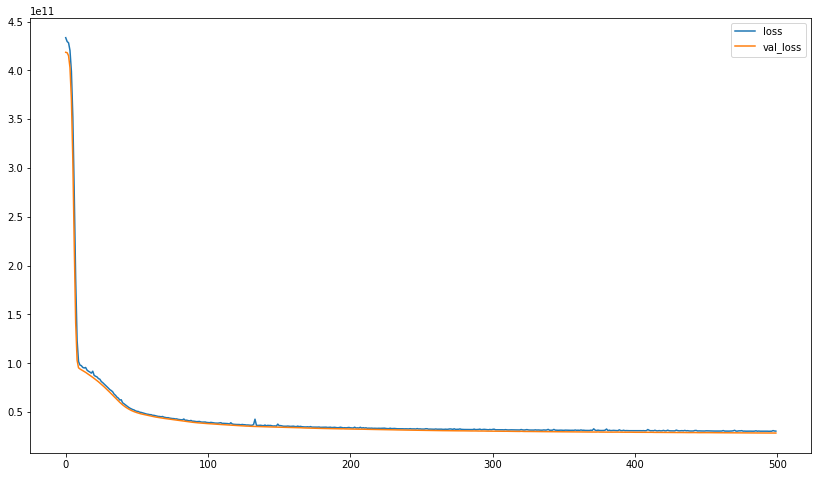

In [97]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(14,8))

In [98]:
X_train.shape

(15117, 19)

# Evaluation on test data

In [0]:
predictions=model.predict(X_test)

In [100]:
predictions

array([[385124.84],
       [584098.9 ],
       [562799.94],
       ...,
       [374505.94],
       [551755.2 ],
       [674727.25]], dtype=float32)

In [101]:
np.sqrt(mean_squared_error(y_test,predictions))

169167.88313530962

In [102]:
#em media, erramos por 100k dolars (20% em relaçao à media de preços)
mean_absolute_error(y_test,predictions)

103992.47030104649

In [103]:
df['price'].mean()

540296.5735055795

In [104]:
#entre 0 e 1, 1 signifca que a diferença é explicada pelo modelo
explained_variance_score(y_test,predictions)

0.7842335773650189

# Plot predictions vs test data

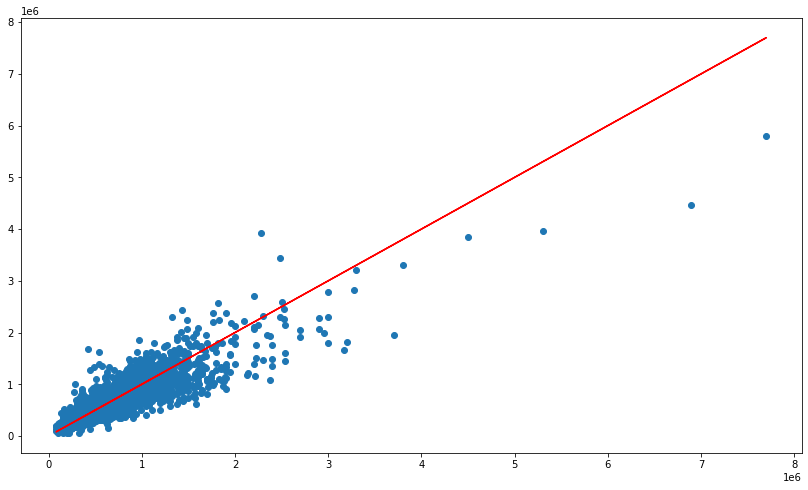

In [105]:
plt.figure(figsize=(14,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

# Predict New House

In [0]:
#pegar na rimeira casa dos dados

In [0]:
single_house=df.drop('price',axis=1).iloc[0]

In [0]:
single_house=scaler.transform(single_house.values.reshape(-1,19))

In [112]:
model.predict(single_house)

array([[287547.56]], dtype=float32)

In [113]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
